# mnist 손글씨 데이터셋
- 간단한 구조의 합성곱 신경망 모델 만들기

## 합성곱이란?
- 원본이미지에 필터를 적용 특성맵을 만드는 과정
- 패딩을 사용하게 되면 원본이미지 크기로 특성맵을 만든다
- 스트라이드(stride) : 몇개씩 건너 뛸까?

![합성곱 연산](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile8.uf.tistory.com%2Fimage%2F990ACC345C666EBC1CBF64)

## 풀링이란?
- 추출된 특성맵을 다운 샘플링하여 이미지 크기를 줄이는 레이어
- 이미지 축소를 통해 연산량을 감소시킴, 과대적합(over-fitting)을 방지한다는 장점이 있다.
- 추출된 특성맵에 대해 다운 샘플링
- 큰값을 추출(max pooling)
- 평균값을 추충(average pooling)
- 스트라이드(stride)에 따라 값 달라짐 

In [2]:
import tensorflow as tf

## 데이터 로드 및 전처리
- 데이터셋을 불러오면 훈련셋, 검증셋으로 구분해 튜플 형태로 정리해 준다

In [24]:
# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist

In [25]:
# 훈련셋, 검증셋 구분
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [26]:
# 데이터 확인
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


- 훈련 데이터셋의 개수는 60,000개
- 검증 데이터셋의 개수는 10,000개
- 가로 세로가 각각 28픽셀인 손글씨 이미지와 솔글씨가 나타내는 숫자 레이블(정답)이 매칭되어 있다

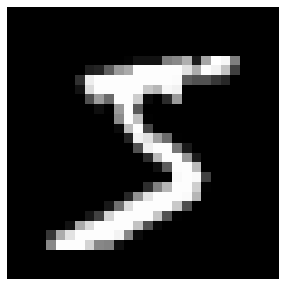

In [27]:
# 훈련 셋의 첫번째(인덱스0) 이미지를 출력
# 샘플 이미지 출력
import matplotlib.pyplot as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis('off')
  plt.show()
  
plot_image(x_train,0)

### 픽셀 값 정규화(스케일링)

In [28]:
# 훈련셋과 검증 셋의 이미지 픽셀을 나나태는 값의 최소값, 최대값을 출력
print(x_train.min(),x_train.max())
print(x_test.min(),x_test.max())

0 255
0 255


- 이미지 픽셀이 0 ~ 255 범위의 숫자로 구성된 것을 파악

In [29]:
# 픽셀 값 정규화(스케일링) = 0 ~ 1 범위
x_train = x_train / 255
x_test = x_test / 255

print(x_train.min(),x_train.max())
print(x_test.min(),x_test.max())

0.0 1.0
0.0 1.0


### 채널 추가
- mnist 데이터셋은 색상을 나타내는 채널이 1개인 모노 컬러 이미지로 구성
- CNN 모델에 주입하기 위해서 색상을 나타내는 채널을 추가해 준다
- tf.newaxis 축을 텐서 배열로 직접 추가하는 방식
- 따라서 (60000,28,28) 형태의 텐서가 (60000,28,28,1) 형태로 변환

In [30]:
# 비교를 위한 출력
print(x_train.shape,x_test.shape)

# 채널 추가 [...,]은 가장 마지막 축에 채널을 추가하기 위함
x_train_in = x_train[..., tf.newaxis]
x_test_in = x_test[..., tf.newaxis]

print(x_train_in.shape, x_test_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


## Sequential API로 모델 생성 및 학습
- 합성곱 레이어 1개, 풀링 레이어 1개를 적용하는 간단한 모델을 만든다
- 최종 분류기로 Dense 레이어 적용을 위해 Flatten 층 추가해 1차원 배열로 펼쳐준다

![풀링](https://yoooniverse.github.io/assets/images/CNNmodel.png)

- 합성곱은 Conv2D 레이어 사용, (3,3) 크기의 서로 다른 32가지 종류의 커널을 적용
- 활성화 함수 : ReLU
- 레이어 이름 : conv
- 풀링 레이어 : (2, 2) 크기, max pooling 적용
- 최종 분류기
- 노드 개수 10개 활성화 함수 : softmax (다중 분류 문제)

### 모델 생성

In [44]:
# sequential API를 사용해 샘플 모델 생성
model = tf.keras.Sequential([# 합성곱 Convolution 적용
                             tf.keras.layers.Conv2D(32,(3,3),
                             activation='relu',
                             input_shape=(28,28,1),
                             name='conv'),
                             
                             # Max pooling 적용
                             tf.keras.layers.MaxPooling2D((2,2),name='pool'),
                             
                             # Classifier 출력층
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(10, activation='softmax')])
# 모델 확인
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten_6 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


### 컴파일
- 옵티마이저 : optimizer=adam
- 손실함수 : loss=sparse_categorical_crossentropy
- 평가지표 : metrics=accuracy

In [45]:
# 모델 컴파일
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

### 모델 훈련
- 훈련셋, 검증셋 주입
- epoch를 10으로 지정
- epoch당 손실과 평가 결과를 출력

In [18]:
# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data=(x_test_in,y_test),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2174 - accuracy: 0.9398 - val_loss: 0.0851 - val_accuracy: 0.9744
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0781 - accuracy: 0.9771 - val_loss: 0.0706 - val_accuracy: 0.9780
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0596 - accuracy: 0.9820 - val_loss: 0.0598 - val_accuracy: 0.9812
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0496 - accuracy: 0.9847 - val_loss: 0.0547 - val_accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0419 - accuracy: 0.9875 - val_loss: 0.0536 - val_accuracy: 0.9819
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0357 - accuracy: 0.9894 - val_loss: 0.0620 - val_accuracy: 0.9801
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0306 - accuracy: 0.9907 - val_loss: 0.0552 -

### 손실과 평가지표 계산
- evaluate() 메소드를 모델 인스턴스에 적용하면 모델의 학습된 가중치를 사용하여 계산 해준다

In [19]:
model.evaluate(x_test_in,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0542 - accuracy: 0.9831


[0.05423097684979439, 0.9830999970436096]

## 모델의 예측오차와 정확도 그래프
- 10 epoch 동안 모델의 예측 오차와 정확도를 그래프로 그리는 함수를 정의

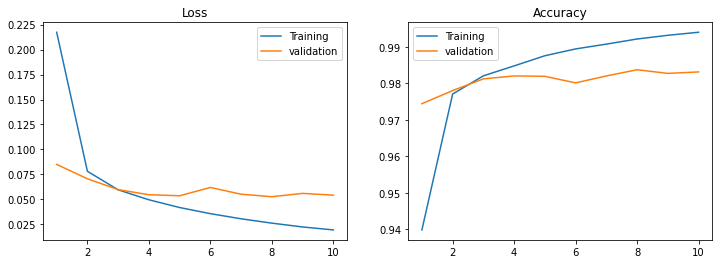

In [20]:
def plot_loss_acc(history, epoch):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    
    fig, axes = plt.subplots(1,2,figsize=(12,4))
    
    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')
    
    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')
    
    plt.show()
    
plot_loss_acc(history, 10)

- 그래프를 보면 훈련셋에 대한 손실은 계속 들어드는데 검증 셋의 손실은 어느 수준에서 더 이상 낮아지지 않는다
- 4 epoch 이후부터는 모델이 과대적합으로 진행 되었다는 것을 파악할 수 있다

## epoch 수 정정
- 4 epoch 이후 모델 과대적합이 발생 했으므로 epoch 수를 4로 정정 후 다시 학습

In [46]:
# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data=(x_test_in,y_test),
                    epochs=4)

Epoch 1/4
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2056 - accuracy: 0.9429 - val_loss: 0.0792 - val_accuracy: 0.9755
Epoch 2/4
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0757 - accuracy: 0.9778 - val_loss: 0.0618 - val_accuracy: 0.9805
Epoch 3/4
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0585 - accuracy: 0.9829 - val_loss: 0.0536 - val_accuracy: 0.9831
Epoch 4/4
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0478 - accuracy: 0.9861 - val_loss: 0.0522 - val_accuracy: 0.9826


In [47]:
model.evaluate(x_test_in,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0522 - accuracy: 0.9826


[0.0522487610578537, 0.9825999736785889]

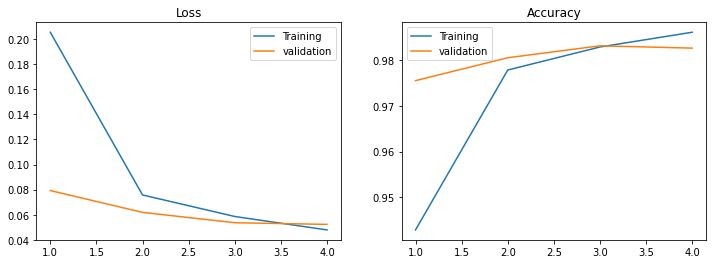

In [48]:
def plot_loss_acc(history, epoch):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    
    fig, axes = plt.subplots(1,2,figsize=(12,4))
    
    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')
    
    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')
    
    plt.show()
    
plot_loss_acc(history, 4)

- 10 epochs = loss: 0.0542 - accuracy: 0.9831
- 4 epochs = loss: 0.0522 - accuracy: 0.9826
- 튜닝 전보다 정확도가 약간 떨어졌지만 오차가 많이 줄어든 것을 알 수 있다

## 예측 

In [51]:
pred = model.predict(x_test_in)
print(pred[0])

[3.0155116e-09 8.3724721e-08 7.2342510e-07 2.9404599e-05 3.2210226e-09
 9.9923370e-10 1.6050571e-14 9.9996471e-01 3.6563216e-07 4.5822881e-06]


In [69]:
# 정답
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [52]:
# 넘파이 argmax 함수를 이용해 예측 확률을 실제 정답 레이블로 변환
import numpy as np
digit_labels = np.argmax(pred, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

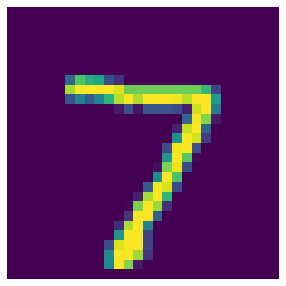

In [66]:
# 검증 데이터셋의 인덱스 0에 해당하는 이미지를 출력하면 숫자 7에 대한 손글씨 이미지
# 샘플 이미지 출력
import matplotlib.pyplot as plt

def plot_image(data, idx):
    plt.figure(figsize=(5,5))
    plt.imshow(data[idx])
    plt.axis('off')
    plt.show()

plot_image(x_test,0)

In [ ]:
|